# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.tree import plot_tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
base = pd.read_csv('./demo01_arvore_de_decisao.csv')

In [13]:
base

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,1,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,0,54.109589,9.884932,1,0,0,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0
16646,16646,0,43.389041,7.380822,1,1,1,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0


In [16]:
y = base.mau.astype(int)
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int32

In [15]:
X = base.drop('mau', axis=1)

In [18]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [38]:
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)

[Text(803.1837476647419, 1066.2923076923078, 'Unnamed: 0 <= 16470.0\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovado'),
 Text(797.1185302734375, 1024.4769230769232, 'tempo_emprego <= 2.848\ngini = 0.024\nsamples = 11530\nvalue = [11392, 138]\nclass = Aprovado'),
 Text(370.1737219769022, 982.6615384615385, 'idade <= 30.175\ngini = 0.034\nsamples = 4222\nvalue = [4149, 73]\nclass = Aprovado'),
 Text(158.8328804347826, 940.8461538461539, 'idade <= 30.137\ngini = 0.08\nsamples = 430\nvalue = [412, 18]\nclass = Aprovado'),
 Text(136.0883152173913, 899.0307692307692, 'Unnamed: 0 <= 13411.0\ngini = 0.068\nsamples = 423\nvalue = [408, 15]\nclass = Aprovado'),
 Text(108.79483695652173, 857.2153846153847, 'idade <= 28.567\ngini = 0.03\nsamples = 331\nvalue = [326, 5]\nclass = Aprovado'),
 Text(102.72961956521739, 815.4000000000001, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]\nclass = Aprovado'),
 Text(114.86005434782608, 815.4000000000001, 'idade <= 28.595\ngini = 0.099\ns

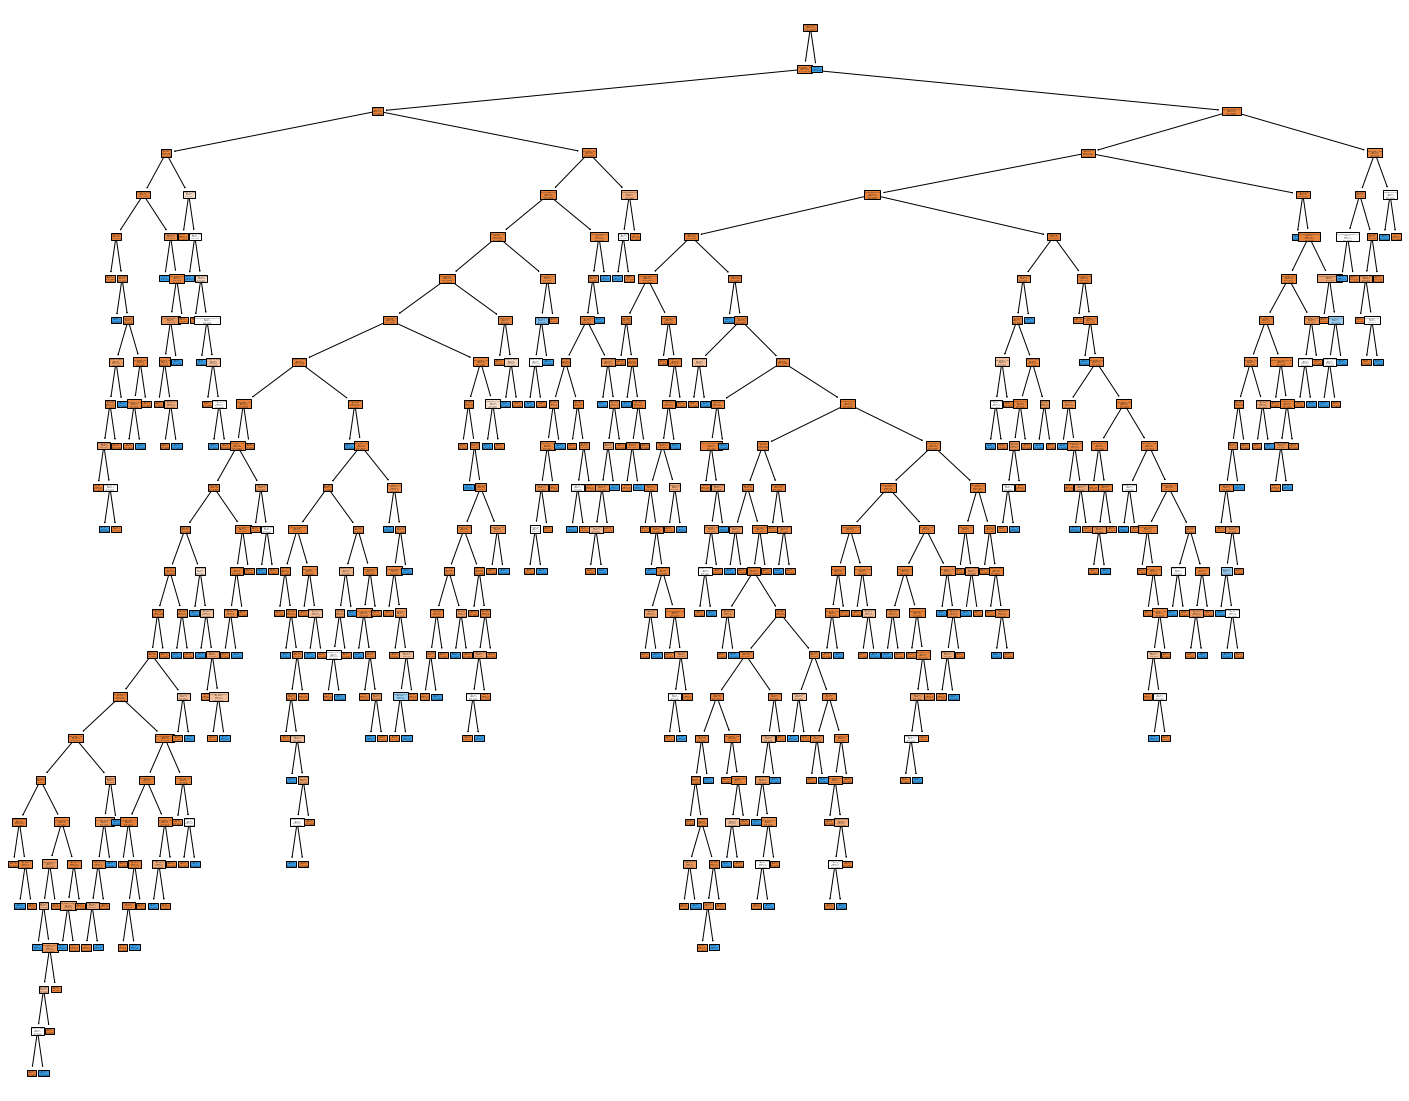

In [25]:
plt.figure(figsize=(25,20))
plot_tree(clf,filled=True,class_names=['Aprovado','Reprovado'],feature_names=X.columns)

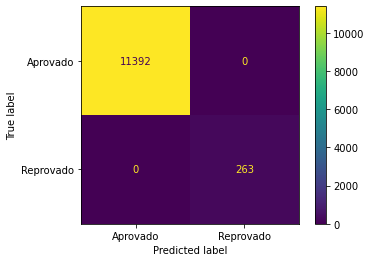

In [44]:
plot_confusion_matrix(clf,X_train,y_train, display_labels=['Aprovado', 'Reprovado'])

In [45]:
score = 1 #pois o total verdadeiro é o mesmo total da amostra

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [ ]:
# 1. Como a acurácia é bem alta existe chance da base estar overfitada


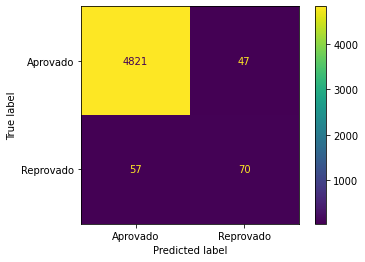

In [42]:
plot_confusion_matrix(clf,X_test,y_test, display_labels=['Aprovado', 'Reprovado'])

In [43]:
accuracy_score(y_test, predict)

0.9791791791791792

In [46]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [53]:
frequencia = {}
for elemento in predict:
    if elemento in frequencia:
        frequencia[elemento] += 1
    else:
        frequencia[elemento] = 1

proporcoes = {}
tamanho_array = len(predict)
for elemento, ocorrencia in frequencia.items():
    proporcao = ocorrencia / tamanho_array
    proporcoes[elemento] = proporcao

for elemento, proporcao in proporcoes.items():
    if elemento == 0:
        elemento = 'bons'
    else:
        elemento = 'maus'
    print(f'{proporcao:.2%} são {elemento} pagadores.')

98.78% são bons pagadores.
1.22% são maus pagadores.


[Text(644.3156250000001, 1037.7818181818182, 'Unnamed: 0 <= 16470.0\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovado'),
 Text(631.915625, 938.9454545454546, 'tempo_emprego <= 2.848\ngini = 0.024\nsamples = 11530\nvalue = [11392, 138]\nclass = Aprovado'),
 Text(278.80625000000003, 840.1090909090909, 'idade <= 30.175\ngini = 0.034\nsamples = 4222\nvalue = [4149, 73]\nclass = Aprovado'),
 Text(111.60000000000001, 741.2727272727273, 'idade <= 30.137\ngini = 0.08\nsamples = 430\nvalue = [412, 18]\nclass = Aprovado'),
 Text(99.2, 642.4363636363637, 'Unnamed: 0 <= 13411.0\ngini = 0.068\nsamples = 423\nvalue = [408, 15]\nclass = Aprovado'),
 Text(49.6, 543.6, 'idade <= 28.567\ngini = 0.03\nsamples = 331\nvalue = [326, 5]\nclass = Aprovado'),
 Text(37.2, 444.76363636363635, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]\nclass = Aprovado'),
 Text(62.0, 444.76363636363635, 'idade <= 28.777\ngini = 0.099\nsamples = 96\nvalue = [91, 5]\nclass = Aprovado'),
 Text(24.8, 345.92727

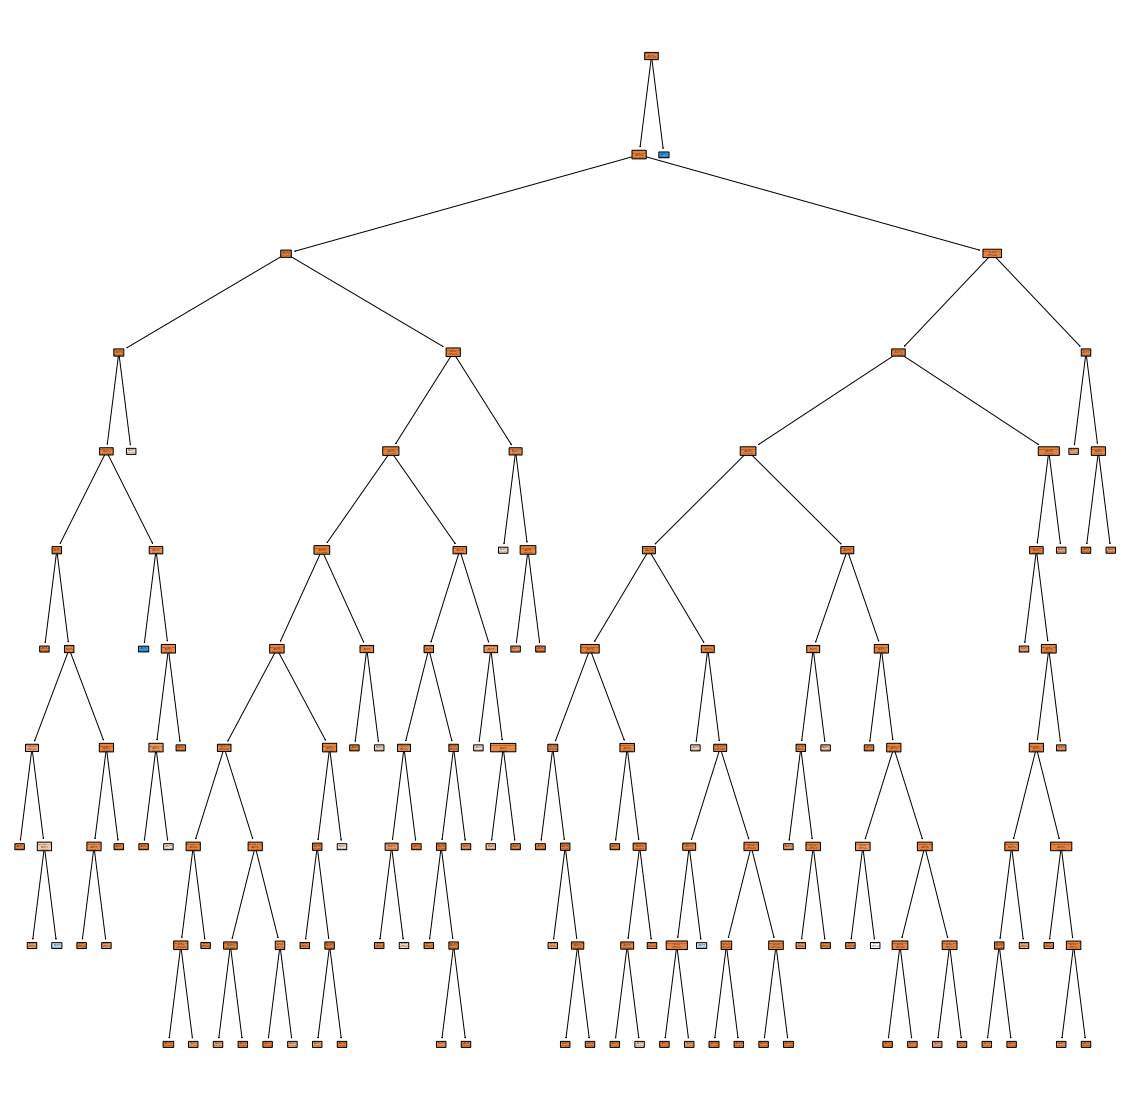

In [47]:
plt.figure(figsize=[20,20])
plot_tree(clf,filled=True,rounded=True,class_names=['Aprovado','Reprovado'],feature_names=X_train.columns)

In [54]:
#Se todos fossem classificados como bons a acurácia ficaria 1 